In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft
from scipy import signal
from mpl_toolkits.mplot3d import Axes3D
import tkinter as tk
from tkinter import filedialog
import time
time.clock = time.time

#Prompt user for file
root = tk.Tk()
root.withdraw()
file_path = filedialog.askopenfilename(filetypes=[("Two Column CSV","*.csv")])
print(file_path)

/Users/student-beta/PycharmProjects/DSP/spectral_analysis/aircraft.csv


In [3]:
#Load Data (assumes two column array
tic = time.clock()
t, x = np.genfromtxt(file_path,delimiter=',', unpack=True)
toc = time.clock()
print("Load Time:",toc-tic)


Load Time: 5.826627969741821


In [5]:
#Determine variables
N = np.int_(np.prod(t.shape))#length of the array
Fs = 1/(t[1]-t[0]) 	#sample rate (Hz)
T = 1/Fs;
print("# Samples:",N)


# Samples: 2465342


Plot Time: 0.16887927055358887


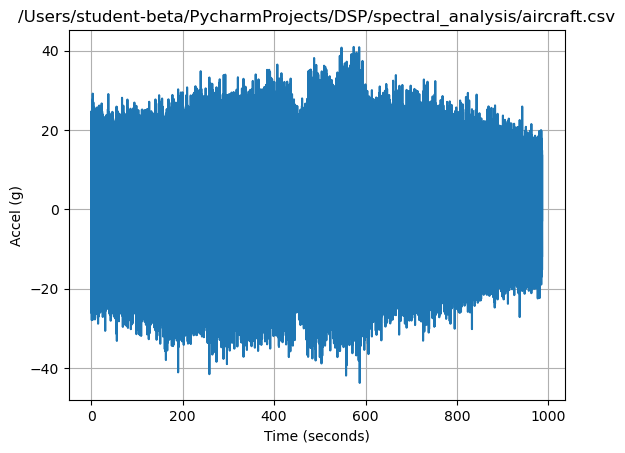

In [7]:
#Plot Data
tic = time.clock()
plt.figure(1)
plt.plot(t, x)
plt.xlabel('Time (seconds)')
plt.ylabel('Accel (g)')
plt.title(file_path)
plt.grid()
toc = time.clock()
print("Plot Time:",toc-tic)


RMS Time: 0.03932380676269531


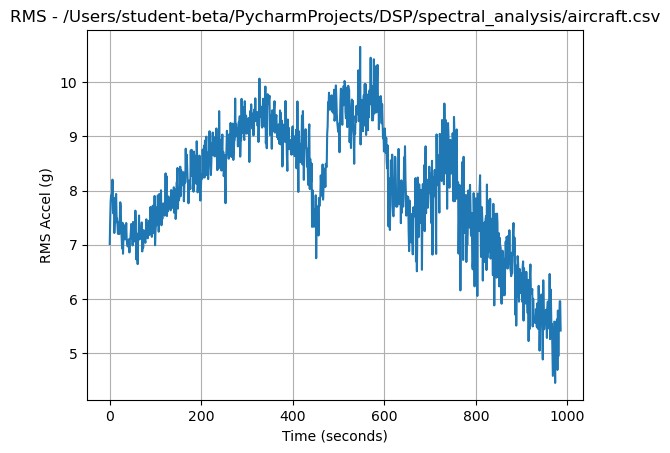

In [9]:
#Compute RMS and Plot
tic = time.clock()
w = np.int_(np.floor(Fs)); #width of the window for computing RMS
steps = np.int_(np.floor(N/w)); #Number of steps for RMS
t_RMS = np.zeros((steps,1)); #Create array for RMS time values
x_RMS = np.zeros((steps,1)); #Create array for RMS values
for i in range (0, steps):
	t_RMS[i] = np.mean(t[(i*w):((i+1)*w)]);
	x_RMS[i] = np.sqrt(np.mean(x[(i*w):((i+1)*w)]**2));
plt.figure(2)
plt.plot(t_RMS, x_RMS)
plt.xlabel('Time (seconds)')
plt.ylabel('RMS Accel (g)')
plt.title('RMS - ' + file_path)
plt.grid()
toc = time.clock()
print("RMS Time:",toc-tic)


FFT Time: 0.8321669101715088


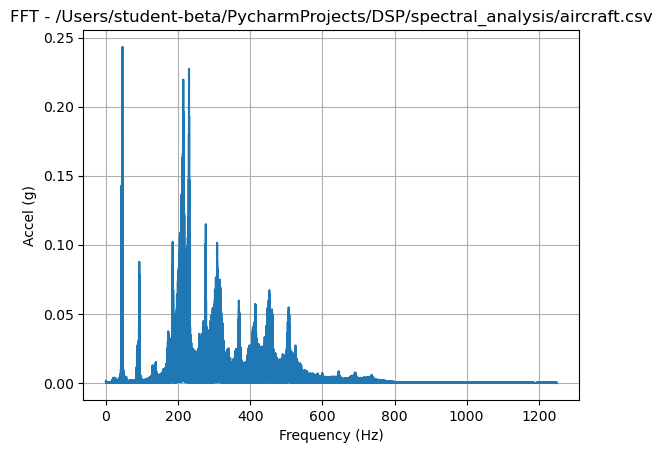

In [11]:
#Compute and Plot FFT
tic = time.clock()
plt.figure(3)
xf = np.linspace(0.0, 1.0/(2.0*T), int(N/2))
yf = fft(x)
plt.plot(xf, 2.0/N * np.abs(yf[0:np.int_(N/2)]))
plt.grid()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Accel (g)')
plt.title('FFT - ' + file_path)
toc = time.clock()
print("FFT Time:",toc-tic)


Spectrogram Time: 0.2410421371459961


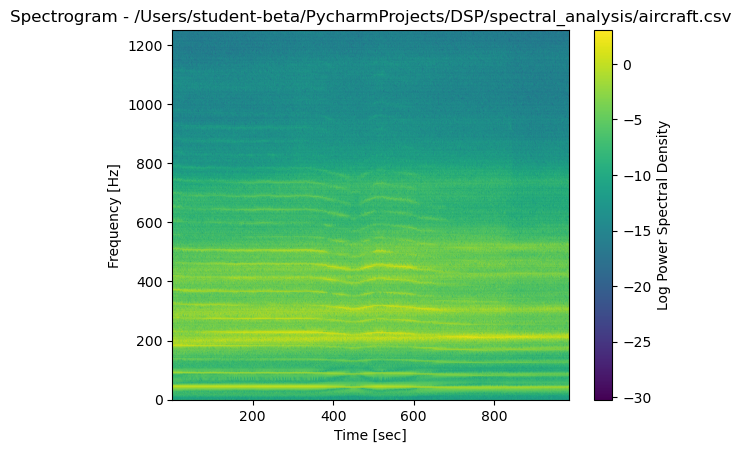

In [16]:
# Compute and Plot Spectrogram
tic = time.clock()
plt.figure(4)
f, t2, Sxx = signal.spectrogram(x, Fs, nperseg=int(Fs/4))
plt.pcolormesh(t2, f, np.log(Sxx), shading='gouraud')  # Added shading for better visualization
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram - ' + file_path)
plt.colorbar(label='Log Power Spectral Density')  # Add colorbar
toc = time.clock()
print("Spectrogram Time:",toc-tic)


3D Spectrogram Time: 0.2898850440979004


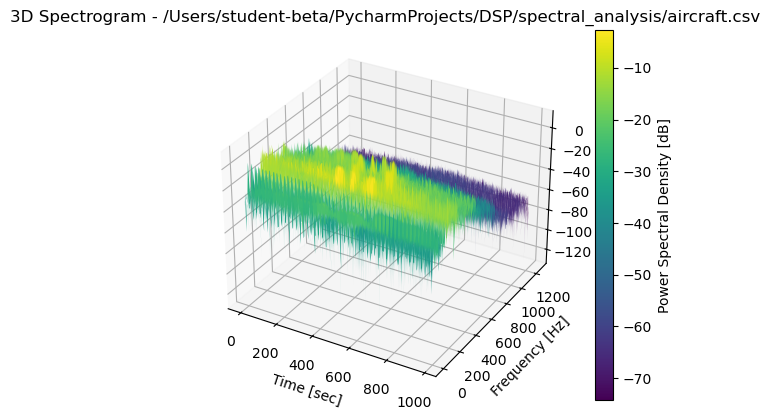

In [18]:
# Compute and Plot 3D Spectrogram
tic = time.time()
plt.figure(5)
ax = plt.axes(projection='3d')

# Compute spectrogram
nperseg = int(Fs / 4)  # Ensure nperseg is an integer
f, t2, Sxx = signal.spectrogram(x, Fs, nperseg=nperseg)

# Create meshgrid for plotting
T, F = np.meshgrid(t2, f)

# Plot 3D surface
surf = ax.plot_surface(T, F, 10 * np.log10(Sxx), cmap='viridis', edgecolor='none')
ax.set_title('3D Spectrogram - ' + file_path)
ax.set_xlabel('Time [sec]')
ax.set_ylabel('Frequency [Hz]')
ax.set_zlabel('Power [dB]')
plt.colorbar(surf, label='Power Spectral Density [dB]')

toc = time.time()
print("3D Spectrogram Time:", toc - tic)

plt.show()